<h1><center><font size=6>Predicting Groundwater Yield with Machine Learning: Insights from Ghana's Aquifers</center></font></h1>

# **Introduction**

Predicting groundwater yield, which is vital to life and agriculture in Ghana, presents additional difficulties. Because traditional methods are somewhat outdated and often cannot capture the complex underlying processes in aquifers, this work is transformative. The aim is to improve the prediction accuracy of groundwater yield in Ghana by attempting to analyze the various aquifers in Ghana using advanced ML tools. By harnessing the power of ML to process and to learn from extensive hydrological data, this study not only seeks to refine prediction accuracy but also to guide sustainable water management, offering a promising avenue for optimizing the use of Ghana's vital groundwater resources.

## **Objectives:**
The objectives of this study on predicting groundwater yield in Ghana using machine learning are as follows:

- To Evaluate the Effectiveness of Machine Learning Algorithms in predicting groundwater yield from various aquifers across Ghana, comparing their performance against traditional hydrological models to ascertain improvements in accuracy and reliability.

- To Identify and Analyze Key Predictive Features that influence groundwater yield, such as geological characteristics, climatic factors, and land use patterns, leveraging machine learning's capability for feature importance evaluation.

- To Develop and Optimize Machine Learning Models for groundwater yield prediction by experimenting with different algorithms, including but not limited to, decision trees, random forests, and gradient boosting machines, and fine-tuning their hyperparameters for optimal performance.

- To Foster a Data-Driven Approach in Groundwater Management by demonstrating how machine learning can provide actionable insights into groundwater resource planning and utilization, thereby supporting sustainable water management practices in Ghana.

- To Contribute to the Scientific Community by adding empirical evidence on the applicability and effectiveness of machine learning in hydrology, particularly in groundwater studies, enriching the body of knowledge and encouraging further research in this area.

## **Data Description**

- **COMMUNITY:** The name of the community.
- **GEOLOGY:** Geological information about the community area.
- **DLONG:** Longitude of the community.
- **DLAT:** Latitude of the community.
- **REGION:** The region in which the community is located.
- **DISTRICT:** The district within the region where the community can be found.
- **RIVERBASIN:** The river basin associated with the community.
- **Land Use:** Describes how the land around the community is used.
- **ANN_TEMP_C:** Annual temperature range in Celsius.
- **ANNUAL_RAI:** Annual rainfall range in millimeters.
- **ETP_MM:** Potential evapotranspiration in millimeters.
- **SOIL:** Type of soil predominant in the community area.
- **HYDRO_PROV:** Hydrological province.
- **BH Yild Range (m3/h):** Range of borehole yield in cubic meters per hour.
- **BH_SUCCESS (%):** Success rate of borehole drilling in percentage.

In [1]:
# Mounting the drive in google colab (should be commented out when working on a local machine)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing essential libraries & the dataset:**

In [2]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
#from sklearn.linear_model import LogisticRegression

# To build regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from math import sqrt
from sklearn.metrics import r2_score


# For tuning the model
from sklearn.model_selection import GridSearchCV

In [3]:
# Importing the data set in google colab
data = pd.read_excel('/content/drive/MyDrive/Copilot/Ghana_Towns_2008.xlsx')

In [4]:
df=data.copy()

In [5]:
data.head()

,COMMUNITY,GEOLOGY,DLONG,DLAT,REGION,DISTRICT,RIVERBASIN,Land Use,ANN_TEMP_C,ANNUAL_RAI,ETP_MM,SOIL,HYDRO_PROV,BH Yild Range (m3/h),BH_SUCCESS (%),Avg. BH Yield (m3/h)
0,Abaadze,Birimian Sediments,-1.08333,5.20000,Central,Mfantsiman,MINOR COASTAL BASIN,Mosaic of thickets & grass with/without scatte...,26 - 27,1000 - 1100,1450-1500,Acrisols,Basement Complex,0.41-29.8,75.00000,12.70000
1,Abaam,Birimian Sediments,-0.83333,6.21667,Eastern,Kwaebibirem,PRA RIVER BASIN,Moderately closed tree (>15 trees/ha) canopy w...,26 - 27,1600 - 1700,1350-1400,Acrisols,Basement Complex,0.41-29.8,75.00000,12.70000
2,Abaasa,Birimian Sediments,-0.95000,5.36667,Central,Ajumako/Enyan/Esunafo,NAKWA RIVER BASIN,Moderately dense herb/bush with scattered tree...,26 - 27,1000 - 1100,1450-1500,Acrisols,Basement Complex,0.41-29.8,75.00000,12.70000
3,Abaase,Obosum & Oti Beds,-1.18333,7.95000,Brong Ahafo,Atebubu,PRU RIVER BASIN,Unclassified/cloud,27 - 28,1200 - 1300,1600-1650,Lixisols,Voltaian System,0.41-9,56.00000,6.20000
4,Ababio,Granites,-0.60000,5.76667,Eastern,West Akim,AYENSU RIVER BASIN,Moderately dense herb/bush with scattered tree...,26 - 27,1200 - 1300,1450-1500,Lixisols,Basement Complex,NaN,68.00000,0.41000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20220 entries, 0 to 20219
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COMMUNITY             20220 non-null  object 
 1   GEOLOGY               19697 non-null  object 
 2   DLONG                 20220 non-null  float64
 3   DLAT                  20220 non-null  float64
 4   REGION                19644 non-null  object 
 5   DISTRICT              19644 non-null  object 
 6   RIVERBASIN            19316 non-null  object 
 7   Land Use              19316 non-null  object 
 8   ANN_TEMP_C            19644 non-null  object 
 9   ANNUAL_RAI            19644 non-null  object 
 10  ETP_MM                19644 non-null  object 
 11  SOIL                  19316 non-null  object 
 12  HYDRO_PROV            19644 non-null  object 
 13  BH Yild Range (m3/h)  15544 non-null  object 
 14  BH_SUCCESS (%)        20220 non-null  float64
 15  Avg. BH Yield (m3/h

## **Observations:**
- There are a total of 20220 rows and 16 feature columns.
- The data has several nullable fields, particularly in "GEOLOGY", "REGION", "DISTRICT", "RIVERBASIN", "Land Use", "SOIL", and "BH Yild Range (m3/h)", suggesting some entries may lack complete information across these attributes.

In [7]:
data.nunique()

COMMUNITY               17114
GEOLOGY                    17
DLONG                     492
DLAT                      604
REGION                     10
DISTRICT                  110
RIVERBASIN                 27
Land Use                   25
ANN_TEMP_C                  6
ANNUAL_RAI                 15
ETP_MM                     17
SOIL                       20
HYDRO_PROV                  6
BH Yild Range (m3/h)        9
BH_SUCCESS (%)             11
Avg. BH Yield (m3/h)       13
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15193 entries, 0 to 20219
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COMMUNITY             15193 non-null  object 
 1   GEOLOGY               15193 non-null  object 
 2   DLONG                 15193 non-null  float64
 3   DLAT                  15193 non-null  float64
 4   REGION                15193 non-null  object 
 5   DISTRICT              15193 non-null  object 
 6   RIVERBASIN            15193 non-null  object 
 7   Land Use              15193 non-null  object 
 8   ANN_TEMP_C            15193 non-null  object 
 9   ANNUAL_RAI            15193 non-null  object 
 10  ETP_MM                15193 non-null  object 
 11  SOIL                  15193 non-null  object 
 12  HYDRO_PROV            15193 non-null  object 
 13  BH Yild Range (m3/h)  15193 non-null  object 
 14  BH_SUCCESS (%)        15193 non-null  float64
 15  Avg. BH Yield (m3/h)  15

In [10]:
columns_to_process = ['ETP_MM', 'ANNUAL_RAI', 'ANN_TEMP_C']

for column in columns_to_process:
    data[column] = data[column].str.split('-').str[0].astype(int)

In [11]:
data.head()

,COMMUNITY,GEOLOGY,DLONG,DLAT,REGION,DISTRICT,RIVERBASIN,Land Use,ANN_TEMP_C,ANNUAL_RAI,ETP_MM,SOIL,HYDRO_PROV,BH Yild Range (m3/h),BH_SUCCESS (%),Avg. BH Yield (m3/h)
0,Abaadze,Birimian Sediments,-1.08333,5.20000,Central,Mfantsiman,MINOR COASTAL BASIN,Mosaic of thickets & grass with/without scatte...,26,1000,1450,Acrisols,Basement Complex,0.41-29.8,75.00000,12.70000
1,Abaam,Birimian Sediments,-0.83333,6.21667,Eastern,Kwaebibirem,PRA RIVER BASIN,Moderately closed tree (>15 trees/ha) canopy w...,26,1600,1350,Acrisols,Basement Complex,0.41-29.8,75.00000,12.70000
2,Abaasa,Birimian Sediments,-0.95000,5.36667,Central,Ajumako/Enyan/Esunafo,NAKWA RIVER BASIN,Moderately dense herb/bush with scattered tree...,26,1000,1450,Acrisols,Basement Complex,0.41-29.8,75.00000,12.70000
3,Abaase,Obosum & Oti Beds,-1.18333,7.95000,Brong Ahafo,Atebubu,PRU RIVER BASIN,Unclassified/cloud,27,1200,1600,Lixisols,Voltaian System,0.41-9,56.00000,6.20000
5,Ababum,Birimian Sediments,-2.28333,5.78333,Western,Wassa Amenfi,ANKOBRA RIVER BASIN,Moderately closed tree (>15 trees/ha) canopy w...,26,1800,1300,Acrisols,Basement Complex,0.41-29.8,75.00000,12.70000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15193 entries, 0 to 20219
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COMMUNITY             15193 non-null  object 
 1   GEOLOGY               15193 non-null  object 
 2   DLONG                 15193 non-null  float64
 3   DLAT                  15193 non-null  float64
 4   REGION                15193 non-null  object 
 5   DISTRICT              15193 non-null  object 
 6   RIVERBASIN            15193 non-null  object 
 7   Land Use              15193 non-null  object 
 8   ANN_TEMP_C            15193 non-null  int64  
 9   ANNUAL_RAI            15193 non-null  int64  
 10  ETP_MM                15193 non-null  int64  
 11  SOIL                  15193 non-null  object 
 12  HYDRO_PROV            15193 non-null  object 
 13  BH Yild Range (m3/h)  15193 non-null  object 
 14  BH_SUCCESS (%)        15193 non-null  float64
 15  Avg. BH Yield (m3/h)  15

In [13]:
data.describe()

,DLONG,DLAT,ANN_TEMP_C,ANNUAL_RAI,ETP_MM,BH_SUCCESS (%),Avg. BH Yield (m3/h)
count,15193.00000,15193.00000,15193.00000,15193.00000,15193.00000,15193.00000,15193.00000
mean,-0.96949,7.42794,26.52044,1234.81208,1578.99691,67.51002,8.40172
std,1.10592,1.84133,0.93340,326.22333,213.95848,14.87973,3.17646
min,-3.25000,4.74250,23.00000,700.00000,1300.00000,36.00000,2.70000
25%,-1.91667,6.01667,26.00000,1000.00000,1400.00000,56.00000,6.20000
50%,-1.01667,6.65000,26.00000,1200.00000,1550.00000,75.00000,8.50000
75%,-0.01667,9.26667,27.00000,1400.00000,1700.00000,76.50000,11.70000
max,1.18333,11.16667,28.00000,2100.00000,2100.00000,87.90000,12.70000


In [14]:
categorical_summary = data.describe(include='object')

print(categorical_summary)

       COMMUNITY             GEOLOGY    REGION      DISTRICT  RIVERBASIN  \
count      15193               15193     15193         15193       15193   
unique     13339                  17        10           106          27   
top      Odumasi  Birimian Sediments  Northern  Wassa Amenfi  VOLTA LAKE   
freq          33                3451      3180           612        2625   

                                                 Land Use      SOIL  \
count                                               15193     15193   
unique                                                 25        20   
top     Moderately dense herb/bush with scattered tree...  Acrisols   
freq                                                 2904      4782   

              HYDRO_PROV BH Yild Range (m3/h)  
count              15193                15193  
unique                 6                    9  
top     Basement Complex            0.41-29.8  
freq                9475                 3475  


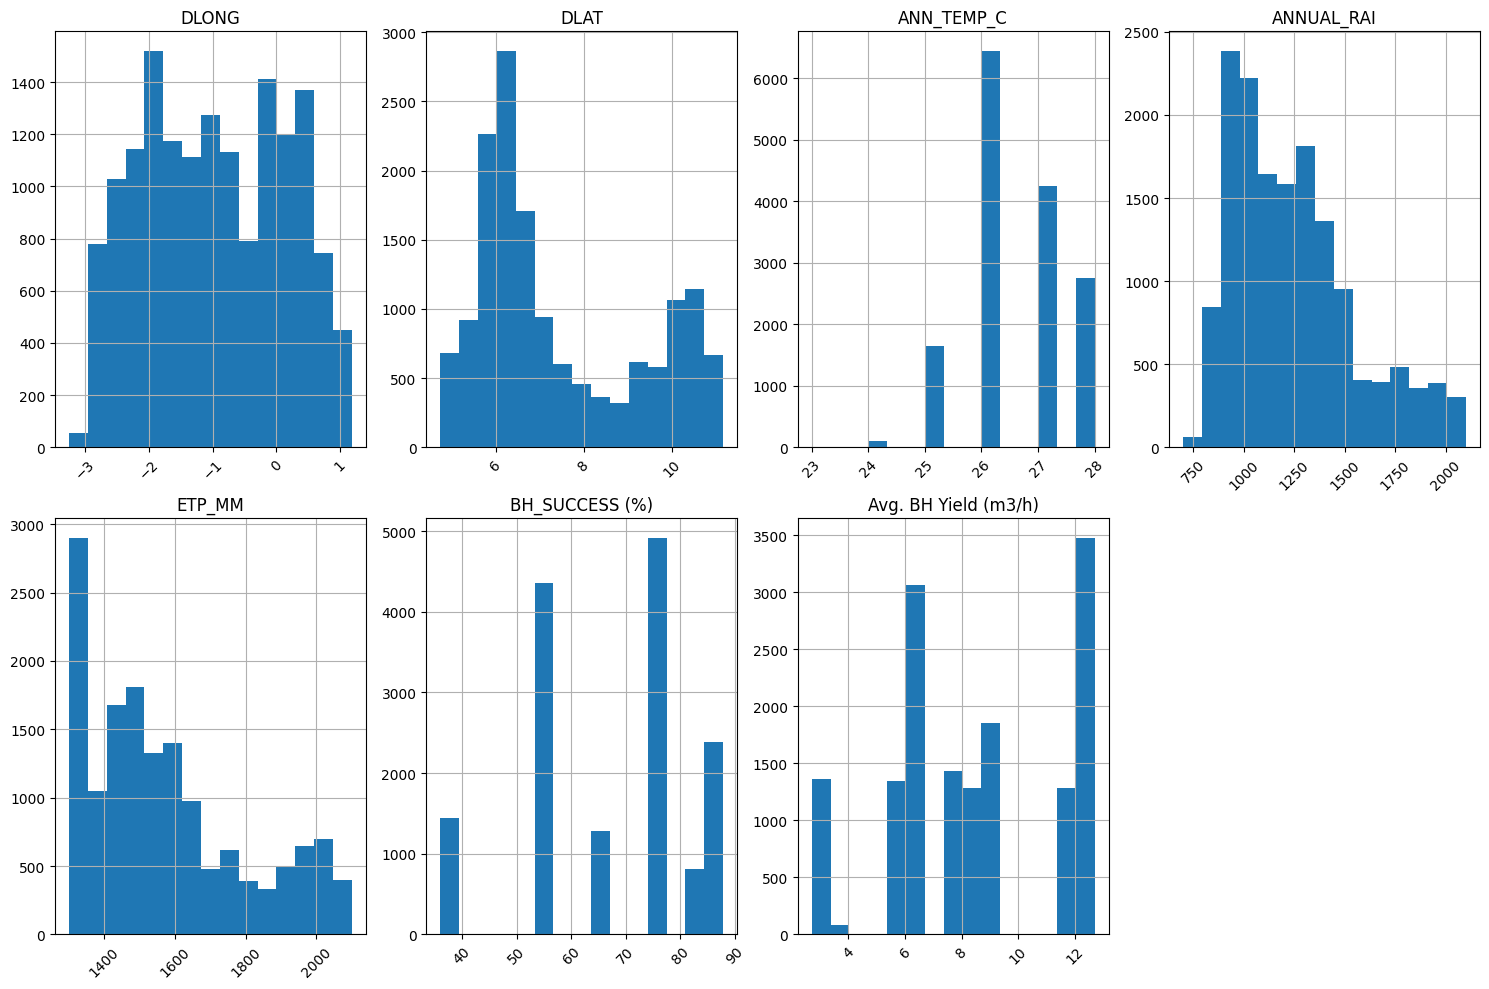

In [15]:
from math import ceil  # Importing the ceil function

# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical variables
data[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(ceil(len(numerical_cols)/4), 4), xrot=45)
plt.tight_layout()
plt.show()

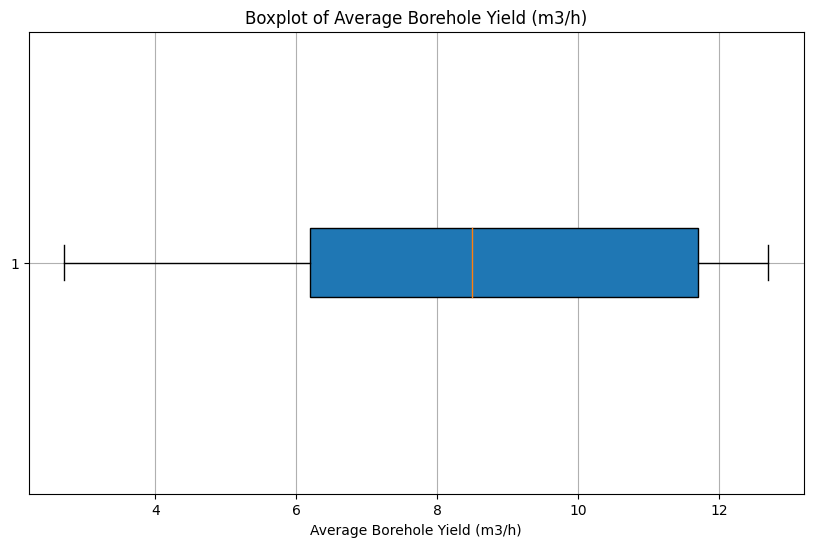

In [16]:
# Plotting the boxplot for the Avg. BH Yield (m3/h) data
plt.figure(figsize=(10, 6))
plt.boxplot(data['Avg. BH Yield (m3/h)'], vert=False, patch_artist=True)
plt.title('Boxplot of Average Borehole Yield (m3/h)')
plt.xlabel('Average Borehole Yield (m3/h)')
plt.grid(True)
plt.show()

## **Feauture Engineering**
Removing coluns considered less relevant for predicting groundwater yield, such as "COMMUNITY", "REGION", "DISTRICT", "Land Use", and "BH Yild Range (m3/h)".

In [17]:
# Removing columns deemed less relevant for a predictive model focusing on groundwater yield
data = data.drop(['COMMUNITY', 'RIVERBASIN', 'REGION', 'DISTRICT', 'HYDRO_PROV', 'Land Use', 'BH Yild Range (m3/h)'], axis=1)
data.head()

,GEOLOGY,DLONG,DLAT,ANN_TEMP_C,ANNUAL_RAI,ETP_MM,SOIL,BH_SUCCESS (%),Avg. BH Yield (m3/h)
0,Birimian Sediments,-1.08333,5.20000,26,1000,1450,Acrisols,75.00000,12.70000
1,Birimian Sediments,-0.83333,6.21667,26,1600,1350,Acrisols,75.00000,12.70000
2,Birimian Sediments,-0.95000,5.36667,26,1000,1450,Acrisols,75.00000,12.70000
3,Obosum & Oti Beds,-1.18333,7.95000,27,1200,1600,Lixisols,56.00000,6.20000
5,Birimian Sediments,-2.28333,5.78333,26,1800,1300,Acrisols,75.00000,12.70000


In [18]:
# Renaming some of the colun names
data_final = data.rename(columns={'BH_SUCCESS (%)': 'BH_SUCCESS', 'ANN_TEMP_C': 'TEMP', 'ANNUAL_RAI': 'PRECIPITATION', 'Avg. BH Yield (m3/h)': 'BH_YIELD'})

In [19]:
data_final.head()

,GEOLOGY,DLONG,DLAT,TEMP,PRECIPITATION,ETP_MM,SOIL,BH_SUCCESS,BH_YIELD
0,Birimian Sediments,-1.08333,5.20000,26,1000,1450,Acrisols,75.00000,12.70000
1,Birimian Sediments,-0.83333,6.21667,26,1600,1350,Acrisols,75.00000,12.70000
2,Birimian Sediments,-0.95000,5.36667,26,1000,1450,Acrisols,75.00000,12.70000
3,Obosum & Oti Beds,-1.18333,7.95000,27,1200,1600,Lixisols,56.00000,6.20000
5,Birimian Sediments,-2.28333,5.78333,26,1800,1300,Acrisols,75.00000,12.70000


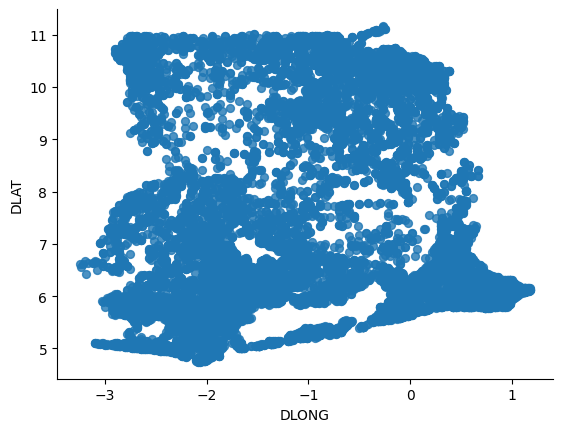

In [20]:
# @title DLONG vs DLAT showing the entire data locations across Ghana

from matplotlib import pyplot as plt
data_final.plot(kind='scatter', x='DLONG', y='DLAT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15193 entries, 0 to 20219
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GEOLOGY        15193 non-null  object 
 1   DLONG          15193 non-null  float64
 2   DLAT           15193 non-null  float64
 3   TEMP           15193 non-null  int64  
 4   PRECIPITATION  15193 non-null  int64  
 5   ETP_MM         15193 non-null  int64  
 6   SOIL           15193 non-null  object 
 7   BH_SUCCESS     15193 non-null  float64
 8   BH_YIELD       15193 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.2+ MB


In [22]:
import pandas as pd

# Preparing data for one-hot encoding
categorical_cols = ['GEOLOGY', 'SOIL']

# One-hot encoding using pandas get_dummies
encoded_df = pd.get_dummies(data_final, columns=categorical_cols, drop_first=True)

# Adding the numerical columns to the encoded dataframe
numerical_cols = ['DLONG', 'DLAT', 'BH_SUCCESS', 'BH_YIELD', 'ETP_MM', 'PRECIPITATION', 'TEMP']
encoded_df[numerical_cols] = data_final[numerical_cols]

# Display the first few rows of the enhanced dataframe to verify the changes
encoded_df.head()

,DLONG,DLAT,TEMP,PRECIPITATION,ETP_MM,BH_SUCCESS,BH_YIELD,GEOLOGY_Basal Sandstone,GEOLOGY_Birimian Sediments,GEOLOGY_Birimian Volcanics,GEOLOGY_Buem,GEOLOGY_Buem Volcanics,GEOLOGY_Dahomeyan (Acidic),GEOLOGY_Dahomeyan (Basic),GEOLOGY_Eocene & Cretaceous,GEOLOGY_Granites,GEOLOGY_Obosum & Oti Beds,GEOLOGY_Recent,GEOLOGY_Sekondian (?Devonian),GEOLOGY_Tarkwaian,GEOLOGY_Tertially,GEOLOGY_Togo Series,GEOLOGY_Upper Voltaian,SOIL_Alisols,SOIL_Arenosols,SOIL_Cambisols,SOIL_Ferralsols,SOIL_Fluvisols,SOIL_Gleysols,SOIL_Leptosols,SOIL_Lixisols,SOIL_Luvisols,SOIL_Nitosols,SOIL_No Data,SOIL_Planosols,SOIL_Plinthosols,SOIL_Regosols,SOIL_Solonchaks,SOIL_Solonetz,SOIL_Vertisols,SOIL_Waterbody,SOIL_Waterbody/No da
0,-1.08333,5.20000,26,1000,1450,75.00000,12.70000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,-0.83333,6.21667,26,1600,1350,75.00000,12.70000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,-0.95000,5.36667,26,1000,1450,75.00000,12.70000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,-1.18333,7.95000,27,1200,1600,56.00000,6.20000,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5,-2.28333,5.78333,26,1800,1300,75.00000,12.70000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
# Renaming some of the colun names
encoded_df = encoded_df.rename(columns={'GEOLOGY_Sekondian (?Devonian)': 'GEOLOGY_Sekondian', 'GEOLOGY_Tertially': 'GEOLOGY_Tertiary', 'SOIL_Waterbody/No da': 'SOIL_Waterbody/No Data'})

In [24]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15193 entries, 0 to 20219
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DLONG                        15193 non-null  float64
 1   DLAT                         15193 non-null  float64
 2   TEMP                         15193 non-null  int64  
 3   PRECIPITATION                15193 non-null  int64  
 4   ETP_MM                       15193 non-null  int64  
 5   BH_SUCCESS                   15193 non-null  float64
 6   BH_YIELD                     15193 non-null  float64
 7   GEOLOGY_Basal Sandstone      15193 non-null  bool   
 8   GEOLOGY_Birimian Sediments   15193 non-null  bool   
 9   GEOLOGY_Birimian Volcanics   15193 non-null  bool   
 10  GEOLOGY_Buem                 15193 non-null  bool   
 11  GEOLOGY_Buem Volcanics       15193 non-null  bool   
 12  GEOLOGY_Dahomeyan (Acidic)   15193 non-null  bool   
 13  GEOLOGY_Dahomeyan (Ba

## **Data Preprocessing**

In [25]:
from sklearn.model_selection import train_test_split

# Preparing the data for modeling
X = encoded_df.drop('BH_YIELD', axis=1)  # Features
y = encoded_df['BH_YIELD']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Building**

In [68]:
# Initializing models
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
lr_regressor = LinearRegression()
svm_regressor = SVR()
nn_regressor = MLPRegressor(random_state=42)
ab_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)

# Training models
rf_regressor.fit(X_train, y_train)
gb_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)
lr_regressor.fit(X_train, y_train)
svm_regressor.fit(X_train, y_train)
nn_regressor.fit(X_train, y_train)
ab_regressor.fit(X_train, y_train)

# Making predictions
rf_predictions = rf_regressor.predict(X_test)
gb_predictions = gb_regressor.predict(X_test)
dt_predictions = dt_regressor.predict(X_test)
xgb_predictions = xgb_regressor.predict(X_test)
lr_predictions = lr_regressor.predict(X_test)
svm_predictions = svm_regressor.predict(X_test)
nn_predictions = nn_regressor.predict(X_test)
ab_predictions = ab_regressor.predict(X_test)

# Calculating R^2 scores
rf_score = r2_score(y_test, rf_predictions)
gb_score = r2_score(y_test, gb_predictions)
dt_score = r2_score(y_test, dt_predictions)
xgb_score = r2_score(y_test, xgb_predictions)
lr_score = r2_score(y_test, lr_predictions)
svm_score = r2_score(y_test, svm_predictions)
nn_score = r2_score(y_test, nn_predictions)
ab_score = r2_score(y_test, ab_predictions)

rf_score, gb_score, dt_score, xgb_score, lr_score, svm_score, nn_score, ab_score

(0.9996525585700572,
 0.9981991066233713,
 0.9998234413953058,
 0.9998022725034399,
 0.9889948611302956,
 0.20831477406038867,
 0.9842635535303053,
 0.9547992248602477)

## **Model Evaluation for Train and Test sets**

In [70]:
# Initialize a list to store the metrics
metrics = []

# Calculate metrics for each model
for model, model_name in zip([rf_regressor, gb_regressor, dt_regressor, xgb_regressor, lr_regressor, svm_regressor, nn_regressor, ab_regressor],
                             ['RandomForest', 'GradientBoosting', 'DecisionTree', 'XGBoost', 'LinearRegression', 'SVM', 'NeuralNetwork', 'AdaBoost']):
    # Training models
    model.fit(X_train, y_train)

    # Training predictions
    train_predictions = model.predict(X_train)
    train_r2 = r2_score(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, train_predictions)

    # Test predictions
    test_predictions = model.predict(X_test)
    test_r2 = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, test_predictions)

    metrics.append([model_name, 'train', train_r2, train_mse, train_rmse, train_mae])
    metrics.append([model_name, 'test', test_r2, test_mse, test_rmse, test_mae])

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Data', 'R2', 'MSE', 'RMSE', 'MAE'])
metrics_df['Rank'] = metrics_df.groupby('Data')['R2'].rank(ascending=False)

metrics_df

,Model,Data,R2,MSE,RMSE,MAE,Rank
0,RandomForest,train,0.99988,0.00124,0.03516,0.00162,3.00000
1,RandomForest,test,0.99965,0.00345,0.05875,0.00219,3.00000
2,GradientBoosting,train,0.99790,0.02131,0.14596,0.07290,4.00000
3,GradientBoosting,test,0.99820,0.01789,0.13375,0.07062,4.00000
4,DecisionTree,train,1.00000,0.00000,0.00000,0.00000,1.00000
5,DecisionTree,test,0.99982,0.00175,0.04188,0.00082,1.00000
6,XGBoost,train,1.00000,0.00002,0.00472,0.00146,2.00000
7,XGBoost,test,0.99980,0.00196,0.04432,0.00311,2.00000
8,LinearRegression,train,0.98106,0.19182,0.43797,0.09117,5.00000
9,LinearRegression,test,0.98899,0.10932,0.33064,0.08197,5.00000


from matplotlib import pyplot as plt
metrics_df['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
metrics_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
metrics_df.groupby('Data').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df.plot(kind='scatter', x='R2', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df.plot(kind='scatter', x='MSE', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df.plot(kind='scatter', x='MAE', y='Rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Data'].value_counts()
    for x_label, grp in metrics_df.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Data')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df, x='R2', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df['Data'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df, x='R2', y='Data', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df, x='MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df['Data'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df, x='MSE', y='Data', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **Model Performance Summary:**

- **Decision Tree** has the highest R^2 score on the test dataset (0.99982) and the lowest RMSE (0.04188) and MAE (0.00082), ranking it 1st. It also shows perfect performance on the training dataset, indicating it has perfectly learned the training data.
- **XGBoost** follows closely with an R^2 score of 0.99980 on the test dataset, slightly higher RMSE (0.04432) and MAE (0.00311) than the Decision Tree, ranking it 2nd.
- **RandomForest and GradientBoosting** show robust performance, with RandomForest having a slightly lower test R^2 (0.99965) compared to GradientBoosting (0.99820). However, both models have higher test RMSE and MAE than Decision Tree and XGBoost, ranking them 3rd and 4th, respectively.
- **Linear Regression** performs reasonably well, with an R^2 of 0.98899 on the test dataset, but has a higher RMSE and MAE compared to ensemble methods, ranking it 5th.
- **Neural Network** shows good performance with an R^2 of 0.98426 on the test dataset, ranking it 6th.
- **AdaBoost and SVM** have the lowest performance among the models evaluated, with - SVM showing significantly lower R^2 scores (0.20831 on test), ranking them 7th and 8th, respectively.

While the Decision Tree model shows outstanding performance, the potential overfitting indicated by its perfect training scores should be carefully evaluated. In the next stage I perform a model tuning for the best three ranked models, Decision Tree, XGBOOST, and random Forest regressors to ensure the models generalize well to new data.

## **Feature of importance for the best the best three models**
Key Predictive Features that influence groundwater yield.

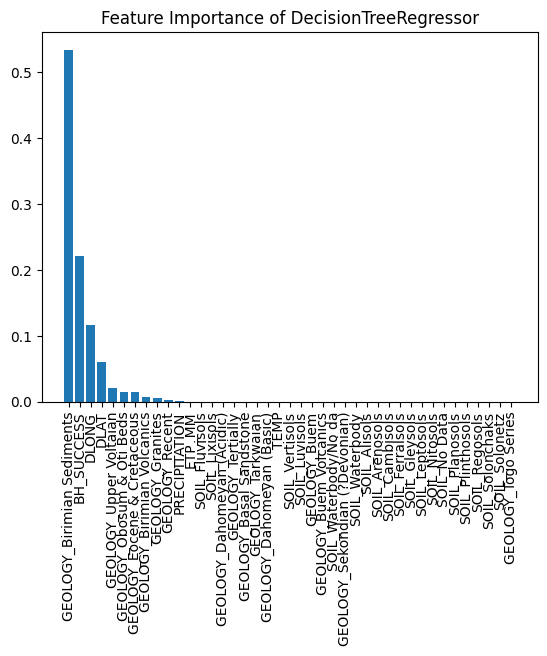

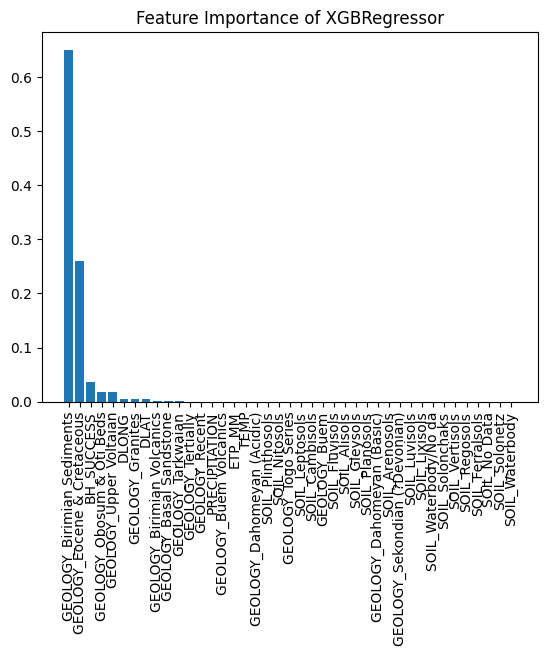

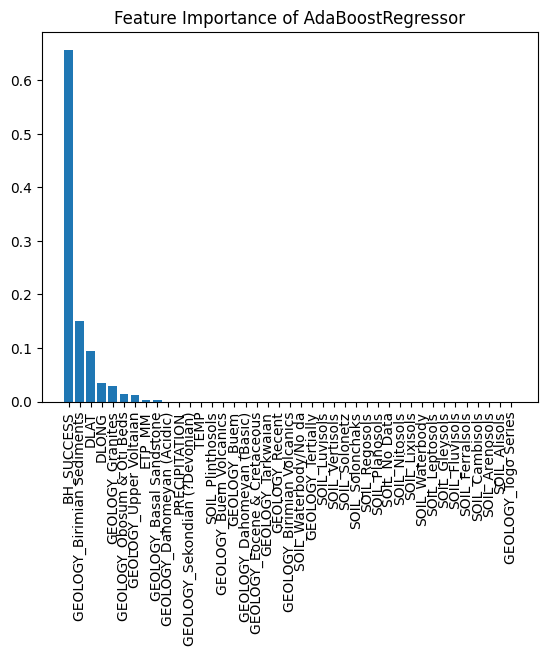

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming that the best three models are DecisionTreeRegressor, XGBRegressor, and AdaBoostRegressor
best_models = [dt_regressor, xgb_regressor, ab_regressor]
model_names = ['DecisionTreeRegressor', 'XGBRegressor', 'AdaBoostRegressor']

# Assuming that X_train is a DataFrame and columns are the feature names
feature_names = X_train.columns

for model, name in zip(best_models, model_names):
    # Get feature importances
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [feature_names[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance of " + name)

    # Add bars
    plt.bar(range(X_train.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X_train.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

## **Decision Tree Model Tuning using GridSearch**

In [81]:
# Setting up the parameter grid
param_grid = {
    'max_depth': np.arange(3, 10),
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initializing the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=make_scorer(r2_score))

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (CV R2):", grid_search.best_score_)

# Evaluating the best model on the test set
best_dt = grid_search.best_estimator_

# Test set predictions and metrics
test_predictions = best_dt.predict(X_test)
test_r2 = r2_score(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)

# Train set predictions and metrics
train_predictions = best_dt.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)

# Outputting the test metrics
print("\nTest Metrics:")
print("R2 score:", test_r2)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("MAE:", test_mae)

# Outputting the train metrics
print("\nTrain Metrics:")
print("R2 score:", train_r2)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("MAE:", train_mae)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
Best parameters: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score (CV R2): 0.994369218868823

Test Metrics:
R2 score: 0.9936809988722681
MSE: 0.06277056731563856
RMSE: 0.25054055024214855
MAE: 0.054702464923266976

Train Metrics:
R2 score: 0.9950442691338247
MSE: 0.050186113119770434
RMSE: 0.22402257279071328
MAE: 0.049633693042791256


## **XGBOOST Model Tuning using GridSearch**

In [82]:
# Setting up the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

# Initializing the XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=make_scorer(r2_score))

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (CV R2):", grid_search.best_score_)

# Evaluating the best model on the test set
best_xgb  = grid_search.best_estimator_

# Test set predictions and metrics
test_predictions = best_xgb.predict(X_test)
test_r2 = r2_score(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)

# Train set predictions and metrics
train_predictions = best_xgb.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)

# Outputting the test metrics
print("\nTest Metrics:")
print("R2 score:", test_r2)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("MAE:", test_mae)

# Outputting the train metrics
print("\nTrain Metrics:")
print("R2 score:", train_r2)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("MAE:", train_mae)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Best score (CV R2): 0.999730158662473

Test Metrics:
R2 score: 0.999783914112676
MSE: 0.002146515479591591
RMSE: 0.04633050269090107
MAE: 0.008845531379521418

Train Metrics:
R2 score: 0.9999456694073655
MSE: 0.0005501996257364962
RMSE: 0.023456334448001378
MAE: 0.007360458413256334


## **Random Forest Model Tuning using GridSearch**

In [83]:
# Setting up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 3, 6, 9],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=make_scorer(r2_score))

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (CV R2):", grid_search.best_score_)

# Evaluating the best model on the test set
best_rf = grid_search.best_estimator_

# Test set predictions and metrics
test_predictions = best_rf.predict(X_test)
test_r2 = r2_score(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)

# Train set predictions and metrics
train_predictions = best_rf.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)

# Outputting the test metrics
print("\nTest Metrics:")
print("R2 score:", test_r2)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("MAE:", test_mae)

# Outputting the train metrics
print("\nTrain Metrics:")
print("R2 score:", train_r2)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("MAE:", train_mae)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score (CV R2): 0.9989679233025603

Test Metrics:
R2 score: 0.9996386872899863
MSE: 0.0035891438104640747
RMSE: 0.05990946344663817
MAE: 0.002326094109982056

Train Metrics:
R2 score: 0.999865261450872
MSE: 0.0013644816982065061
RMSE: 0.03693889140467681
MAE: 0.0016379463551875607


## **Dataframe of Tuned Model evaluation metric for the DT, RF and XGBOOST regressors**

In [84]:
# Function to calculate metrics
def get_model_metrics(model, X_train, y_train, X_test, y_test, model_name):
    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculating metrics
    metrics = {
        'Model': model_name,
        'Train_R2': r2_score(y_train, train_predictions),
        'Test_R2': r2_score(y_test, test_predictions),
        'Train_RMSE': sqrt(mean_squared_error(y_train, train_predictions)),
        'Test_RMSE': sqrt(mean_squared_error(y_test, test_predictions)),
        'Train_MAE': mean_absolute_error(y_train, train_predictions),
        'Test_MAE': mean_absolute_error(y_test, test_predictions)
    }
    return metrics

# Assuming you have the best_estimator_ for each model from GridSearchCV
# best_dt = grid_search_dt.best_estimator_
# best_xgb = grid_search_xgb.best_estimator_
# best_rf = grid_search_rf.best_estimator_

# Replace above placeholders with your actual models
# Collect metrics for each model
all_metrics = []
all_metrics.append(get_model_metrics(best_dt, X_train, y_train, X_test, y_test, 'DecisionTree'))
all_metrics.append(get_model_metrics(best_xgb, X_train, y_train, X_test, y_test, 'XGBoost'))
all_metrics.append(get_model_metrics(best_rf, X_train, y_train, X_test, y_test, 'RandomForest'))

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(all_metrics)

# Display the DataFrame
print(metrics_df)


          Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE
0  DecisionTree   0.99504  0.99368     0.22402    0.25054    0.04963   0.05470
1       XGBoost   0.99995  0.99978     0.02346    0.04633    0.00736   0.00885
2  RandomForest   0.99987  0.99964     0.03694    0.05991    0.00164   0.00233


## **Observations - Tuned Model Performance**

- The XGBoost model has the highest R^2 score on the test set (0.99978), indicating an exceptional level of variance explained by the model. This suggests that the model can predict groundwater yield with high accuracy.

- XGBoost also has the lowest Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) on the test set among the three models, with values of 0.04633 and 0.00885, respectively. Lower errors on the test set imply that the model's predictions are close to the actual values, showcasing its predictive precision.

- While all models show high training R^2 scores, indicating they've learned well from the training data, the XGBoost model demonstrates superior generalization to unseen data, as evidenced by its test metrics closely mirroring the training metrics. This balance suggests that XGBoost is less prone to overfitting compared to the other models.

## **Conclusions:**


- The Decision Tree model, while robust and interpretable, shows a slight decrease in performance from training to testing, suggesting some overfitting. The Random Forest model offers excellent performance, with very high R^2 scores and low error metrics, but is slightly outperformed by XGBoost in terms of both accuracy and error rates on the test set.

- XGBoost stands out as the most suitable model for production due to its unparalleled accuracy (as shown by the R^2 score), lower prediction errors (RMSE and MAE), and strong generalization capability from training to test datasets. This model combines the advantages of ensemble learning with gradient boosting techniques, making it highly effective for complex regression tasks like groundwater yield prediction.

In summary, while all three models demonstrate high predictive capability, the XGBoost model is recommended for production deployment to predict groundwater yield. Its performance suggests it can provide reliable, accurate forecasts that are crucial for effective water resource management. This analysis underscores the importance of not only considering model accuracy but also evaluating how models generalize to new data, ensuring that the chosen model will perform well in real-world applications.





